Text(0.5, 1.0, 'Sentiment Classification on Amazon Customer reviews in 2013')

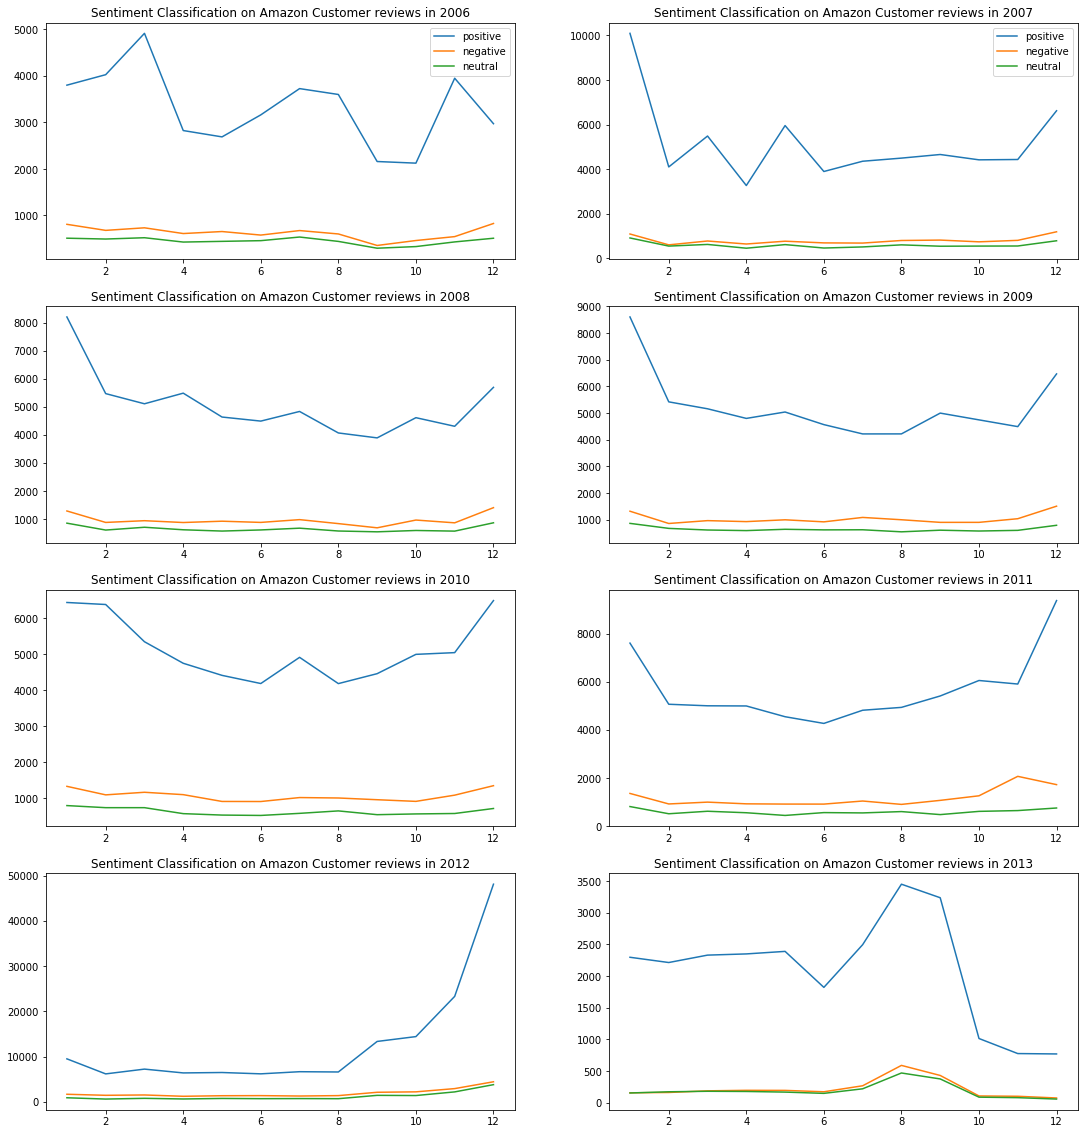

In [5]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import multi_rake
import re
import string
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from multi_rake import Rake
import nltk
import csv
pd.options.mode.chained_assignment = None  # default='warn'
#2013
az_13org = pd.read_csv('/Users/jiaruizhang/Desktop/reviews/AZ_Review/2013.csv',engine ='python') 
az_2013 = az_13org.iloc[:30000,:11]
AZ_review_date = az_2013.review_date
AZ_star = az_2013.star
AZ_review_date = AZ_review_date.to_frame()
AZ_star = AZ_star.to_frame()
frames = [AZ_star,AZ_review_date]
AZ_2013 = pd.concat(frames,axis = 1, sort = True)

negative_2013 = AZ_2013[(AZ_2013.star == '1')|(AZ_2013.star == '2')]
positive_2013 = AZ_2013[(AZ_2013.star == '4')|(AZ_2013.star == '5')]
neutral_2013 = AZ_2013[AZ_2013.star == '3']
neutral_2013.review_date = pd.to_datetime(neutral_2013.review_date)
negative_2013.review_date = pd.to_datetime(negative_2013.review_date)
positive_2013.review_date = pd.to_datetime(positive_2013.review_date)

# filter by single month
neutral_lis_2013 = []
time = []
for i in range(1,13,1):
    time += [i]
    if i < 10:
        temp = '2013-0'+str(i)
    else:
        temp = '2013-'+str(i)
    neutral_lis_2013 += [len(neutral_2013[neutral_2013['review_date'].dt.strftime('%Y-%m') == temp])]
# filter by single year
#df = df[df['date'].dt.strftime('%Y') == '2014']

# filter by single month
negative_lis_2013 = []
for i in range(1,13,1):
    if i < 10:
        temp = '2013-0'+str(i)
    else:
        temp = '2013-'+str(i)
    negative_lis_2013 += [len(negative_2013[negative_2013['review_date'].dt.strftime('%Y-%m') == temp])]
# filter by single year
#df = df[df['date'].dt.strftime('%Y') == '2014']

# filter by single month
positive_lis_2013 = []
for i in range(1,13,1):
    if i < 10:
        temp = '2013-0'+str(i)
    else:
        temp = '2013-'+str(i)
    positive_lis_2013 += [len(positive_2013[positive_2013['review_date'].dt.strftime('%Y-%m') == temp])]
# filter by single year
#df = df[df['date'].dt.strftime('%Y') == '2014']


#2012
az_2012 = pd.read_csv('/Users/jiaruizhang/Desktop/reviews/AZ_Review/2012.csv',engine ='python') 
AZ_review_date_2012 = az_2012.review_date
AZ_star_2012 = az_2012.star
AZ_review_date_2012 = AZ_review_date_2012.to_frame()
AZ_star_2012 = AZ_star_2012.to_frame()
frames_2012 = [AZ_star_2012,AZ_review_date_2012]
AZ_2012 = pd.concat(frames_2012,axis = 1, sort = True)

negative_2012 = AZ_2012[(AZ_2012.star == 1)|(AZ_2012.star == 2)]
positive_2012 = AZ_2012[(AZ_2012.star == 4)|(AZ_2012.star == 5)]
neutral_2012 = AZ_2012[AZ_2012.star == 3]
neutral_2012.review_date = pd.to_datetime(neutral_2012.review_date)
negative_2012.review_date = pd.to_datetime(negative_2012.review_date)
positive_2012.review_date = pd.to_datetime(positive_2012.review_date)
# filter by single month
neutral_lis_2012 = []
for i in range(1,13,1):
    if i < 10:
        temp = '2012-0'+str(i)
    else:
        temp = '2012-'+str(i)
    neutral_lis_2012 += [len(neutral_2012[neutral_2012['review_date'].dt.strftime('%Y-%m') == temp])]
# filter by single year
#df = df[df['date'].dt.strftime('%Y') == '2014']

# filter by single month
negative_lis_2012 = []
for i in range(1,13,1):
    if i < 10:
        temp = '2012-0'+str(i)
    else:
        temp = '2012-'+str(i)
    negative_lis_2012 += [len(negative_2012[negative_2012['review_date'].dt.strftime('%Y-%m') == temp])]
# filter by single year
#df = df[df['date'].dt.strftime('%Y') == '2014']

# filter by single month
positive_lis_2012 = []
for i in range(1,13,1):
    if i < 10:
        temp = '2012-0'+str(i)
    else:
        temp = '2012-'+str(i)
    positive_lis_2012 += [len(positive_2012[positive_2012['review_date'].dt.strftime('%Y-%m') == temp])]


#2011
az_2011 = pd.read_csv('/Users/jiaruizhang/Desktop/reviews/AZ_Review/2011.csv',engine ='python') 
AZ_review_date_2011 = az_2011.review_date
AZ_star_2011 = az_2011.star
AZ_review_date_2011 = AZ_review_date_2011.to_frame()
AZ_star_2011 = AZ_star_2011.to_frame()
frames_2011 = [AZ_star_2011,AZ_review_date_2011]
AZ_2011 = pd.concat(frames_2011,axis = 1, sort = True)

negative_2011 = AZ_2011[(AZ_2011.star == 1)|(AZ_2011.star == 2)]
positive_2011 = AZ_2011[(AZ_2011.star == 4)|(AZ_2011.star == 5)]
neutral_2011 = AZ_2011[AZ_2011.star == 3]
neutral_2011.review_date = pd.to_datetime(neutral_2011.review_date)
negative_2011.review_date = pd.to_datetime(negative_2011.review_date)
positive_2011.review_date = pd.to_datetime(positive_2011.review_date)
# filter by single month
neutral_lis_2011 = []
for i in range(1,13,1):
    if i < 10:
        temp = '2011-0'+str(i)
    else:
        temp = '2011-'+str(i)
    neutral_lis_2011 += [len(neutral_2011[neutral_2011['review_date'].dt.strftime('%Y-%m') == temp])]
# filter by single year
#df = df[df['date'].dt.strftime('%Y') == '2014']

# filter by single month
negative_lis_2011 = []
for i in range(1,13,1):
    if i < 10:
        temp = '2011-0'+str(i)
    else:
        temp = '2011-'+str(i)
    negative_lis_2011 += [len(negative_2011[negative_2011['review_date'].dt.strftime('%Y-%m') == temp])]
# filter by single year
#df = df[df['date'].dt.strftime('%Y') == '2014']

# filter by single month
positive_lis_2011 = []
for i in range(1,13,1):
    if i < 10:
        temp = '2011-0'+str(i)
    else:
        temp = '2011-'+str(i)
    positive_lis_2011 += [len(positive_2011[positive_2011['review_date'].dt.strftime('%Y-%m') == temp])]



#2010
az_2010 = pd.read_csv('/Users/jiaruizhang/Desktop/reviews/AZ_Review/2010.csv',engine ='python') 
AZ_review_date_2010 = az_2010.review_date
AZ_star_2010 = az_2010.star
AZ_review_date_2010 = AZ_review_date_2010.to_frame()
AZ_star_2010 = AZ_star_2010.to_frame()
frames_2010 = [AZ_star_2010,AZ_review_date_2010]
AZ_2010 = pd.concat(frames_2010,axis = 1, sort = True)

negative_2010 = AZ_2010[(AZ_2010.star == 1)|(AZ_2010.star == 2)]
positive_2010 = AZ_2010[(AZ_2010.star == 4)|(AZ_2010.star == 5)]
neutral_2010 = AZ_2010[AZ_2010.star == 3]
neutral_2010.review_date = pd.to_datetime(neutral_2010.review_date)
negative_2010.review_date = pd.to_datetime(negative_2010.review_date)
positive_2010.review_date = pd.to_datetime(positive_2010.review_date)
# filter by single month
neutral_lis_2010 = []
for i in range(1,13,1):
    if i < 10:
        temp = '2010-0'+str(i)
    else:
        temp = '2010-'+str(i)
    neutral_lis_2010 += [len(neutral_2010[neutral_2010['review_date'].dt.strftime('%Y-%m') == temp])]
# filter by single year
#df = df[df['date'].dt.strftime('%Y') == '2014']

# filter by single month
negative_lis_2010 = []
for i in range(1,13,1):
    if i < 10:
        temp = '2010-0'+str(i)
    else:
        temp = '2010-'+str(i)
    negative_lis_2010 += [len(negative_2010[negative_2010['review_date'].dt.strftime('%Y-%m') == temp])]
# filter by single year
#df = df[df['date'].dt.strftime('%Y') == '2014']

# filter by single month
positive_lis_2010 = []
for i in range(1,13,1):
    if i < 10:
        temp = '2010-0'+str(i)
    else:
        temp = '2010-'+str(i)
    positive_lis_2010 += [len(positive_2010[positive_2010['review_date'].dt.strftime('%Y-%m') == temp])]





#2009
az_2009 = pd.read_csv('/Users/jiaruizhang/Desktop/reviews/AZ_Review/2009.csv',engine ='python') 
AZ_review_date_2009 = az_2009.review_date
AZ_star_2009 = az_2009.star
AZ_review_date_2009 = AZ_review_date_2009.to_frame()
AZ_star_2009 = AZ_star_2009.to_frame()
frames_2009 = [AZ_star_2009,AZ_review_date_2009]
AZ_2009 = pd.concat(frames_2009,axis = 1, sort = True)

negative_2009 = AZ_2009[(AZ_2009.star == 1)|(AZ_2009.star == 2)]
positive_2009 = AZ_2009[(AZ_2009.star == 4)|(AZ_2009.star == 5)]
neutral_2009 = AZ_2009[AZ_2009.star == 3]
neutral_2009.review_date = pd.to_datetime(neutral_2009.review_date)
negative_2009.review_date = pd.to_datetime(negative_2009.review_date)
positive_2009.review_date = pd.to_datetime(positive_2009.review_date)
# filter by single month
neutral_lis_2009 = []
for i in range(1,13,1):
    if i < 10:
        temp = '2009-0'+str(i)
    else:
        temp = '2009-'+str(i)
    neutral_lis_2009 += [len(neutral_2009[neutral_2009['review_date'].dt.strftime('%Y-%m') == temp])]
# filter by single year
#df = df[df['date'].dt.strftime('%Y') == '2014']

# filter by single month
negative_lis_2009 = []
for i in range(1,13,1):
    if i < 10:
        temp = '2009-0'+str(i)
    else:
        temp = '2009-'+str(i)
    negative_lis_2009 += [len(negative_2009[negative_2009['review_date'].dt.strftime('%Y-%m') == temp])]
# filter by single year
#df = df[df['date'].dt.strftime('%Y') == '2014']

# filter by single month
positive_lis_2009 = []
for i in range(1,13,1):
    if i < 10:
        temp = '2009-0'+str(i)
    else:
        temp = '2009-'+str(i)
    positive_lis_2009 += [len(positive_2009[positive_2009['review_date'].dt.strftime('%Y-%m') == temp])]




#2008
az_2008 = pd.read_csv('/Users/jiaruizhang/Desktop/reviews/AZ_Review/2008.csv',engine ='python') 
AZ_review_date_2008 = az_2008.review_date
AZ_star_2008 = az_2008.star
AZ_review_date_2008 = AZ_review_date_2008.to_frame()
AZ_star_2008 = AZ_star_2008.to_frame()
frames_2008 = [AZ_star_2008,AZ_review_date_2008]
AZ_2008 = pd.concat(frames_2008,axis = 1, sort = True)

negative_2008 = AZ_2008[(AZ_2008.star == 1)|(AZ_2008.star == 2)]
positive_2008 = AZ_2008[(AZ_2008.star == 4)|(AZ_2008.star == 5)]
neutral_2008 = AZ_2008[AZ_2008.star == 3]
neutral_2008.review_date = pd.to_datetime(neutral_2008.review_date)
negative_2008.review_date = pd.to_datetime(negative_2008.review_date)
positive_2008.review_date = pd.to_datetime(positive_2008.review_date)
# filter by single month
neutral_lis_2008 = []
for i in range(1,13,1):
    if i < 10:
        temp = '2008-0'+str(i)
    else:
        temp = '2008-'+str(i)
    neutral_lis_2008 += [len(neutral_2008[neutral_2008['review_date'].dt.strftime('%Y-%m') == temp])]
# filter by single year
#df = df[df['date'].dt.strftime('%Y') == '2014']

# filter by single month
negative_lis_2008 = []
for i in range(1,13,1):
    if i < 10:
        temp = '2008-0'+str(i)
    else:
        temp = '2008-'+str(i)
    negative_lis_2008 += [len(negative_2008[negative_2008['review_date'].dt.strftime('%Y-%m') == temp])]
# filter by single year
#df = df[df['date'].dt.strftime('%Y') == '2014']

# filter by single month
positive_lis_2008 = []
for i in range(1,13,1):
    if i < 10:
        temp = '2008-0'+str(i)
    else:
        temp = '2008-'+str(i)
    positive_lis_2008 += [len(positive_2008[positive_2008['review_date'].dt.strftime('%Y-%m') == temp])]




#2007
az_2007 = pd.read_csv('/Users/jiaruizhang/Desktop/reviews/AZ_Review/2007.csv',engine ='python') 
AZ_review_date_2007 = az_2007.review_date
AZ_star_2007 = az_2007.star
AZ_review_date_2007 = AZ_review_date_2007.to_frame()
AZ_star_2007 = AZ_star_2007.to_frame()
frames_2007 = [AZ_star_2007,AZ_review_date_2007]
AZ_2007 = pd.concat(frames_2007,axis = 1, sort = True)

negative_2007 = AZ_2007[(AZ_2007.star == 1)|(AZ_2007.star == 2)]
positive_2007 = AZ_2007[(AZ_2007.star == 4)|(AZ_2007.star == 5)]
neutral_2007 = AZ_2007[AZ_2007.star == 3]
neutral_2007.review_date = pd.to_datetime(neutral_2007.review_date)
negative_2007.review_date = pd.to_datetime(negative_2007.review_date)
positive_2007.review_date = pd.to_datetime(positive_2007.review_date)
# filter by single month
neutral_lis_2007 = []
for i in range(1,13,1):
    if i < 10:
        temp = '2007-0'+str(i)
    else:
        temp = '2007-'+str(i)
    neutral_lis_2007 += [len(neutral_2007[neutral_2007['review_date'].dt.strftime('%Y-%m') == temp])]
# filter by single year
#df = df[df['date'].dt.strftime('%Y') == '2014']

# filter by single month
negative_lis_2007 = []
for i in range(1,13,1):
    if i < 10:
        temp = '2007-0'+str(i)
    else:
        temp = '2007-'+str(i)
    negative_lis_2007 += [len(negative_2007[negative_2007['review_date'].dt.strftime('%Y-%m') == temp])]
# filter by single year
#df = df[df['date'].dt.strftime('%Y') == '2014']

# filter by single month
positive_lis_2007 = []
for i in range(1,13,1):
    if i < 10:
        temp = '2007-0'+str(i)
    else:
        temp = '2007-'+str(i)
    positive_lis_2007 += [len(positive_2007[positive_2007['review_date'].dt.strftime('%Y-%m') == temp])]



#2006
az_2006 = pd.read_csv('/Users/jiaruizhang/Desktop/reviews/AZ_Review/2006.csv',engine ='python') 
AZ_review_date_2006 = az_2006.review_date
AZ_star_2006 = az_2006.star
AZ_review_date_2006 = AZ_review_date_2006.to_frame()
AZ_star_2006 = AZ_star_2006.to_frame()
frames_2006 = [AZ_star_2006,AZ_review_date_2006]
AZ_2006 = pd.concat(frames_2006,axis = 1, sort = True)

negative_2006 = AZ_2006[(AZ_2006.star == 1)|(AZ_2006.star == 2)]
positive_2006 = AZ_2006[(AZ_2006.star == 4)|(AZ_2006.star == 5)]
neutral_2006 = AZ_2006[AZ_2006.star == 3]
neutral_2006.review_date = pd.to_datetime(neutral_2006.review_date)
negative_2006.review_date = pd.to_datetime(negative_2006.review_date)
positive_2006.review_date = pd.to_datetime(positive_2006.review_date)
# filter by single month
neutral_lis_2006 = []
for i in range(1,13,1):
    if i < 10:
        temp = '2006-0'+str(i)
    else:
        temp = '2006-'+str(i)
    neutral_lis_2006 += [len(neutral_2006[neutral_2006['review_date'].dt.strftime('%Y-%m') == temp])]
# filter by single year
#df = df[df['date'].dt.strftime('%Y') == '2014']

# filter by single month
negative_lis_2006 = []
for i in range(1,13,1):
    if i < 10:
        temp = '2006-0'+str(i)
    else:
        temp = '2006-'+str(i)
    negative_lis_2006 += [len(negative_2006[negative_2006['review_date'].dt.strftime('%Y-%m') == temp])]
# filter by single year
#df = df[df['date'].dt.strftime('%Y') == '2014']

# filter by single month
positive_lis_2006 = []
for i in range(1,13,1):
    if i < 10:
        temp = '2006-0'+str(i)
    else:
        temp = '2006-'+str(i)
    positive_lis_2006 += [len(positive_2006[positive_2006['review_date'].dt.strftime('%Y-%m') == temp])]





#plot 8 graphs for 8 years
labels = ["positive","negative","neutral"]
fig, axs = plt.subplots(4, 2)
fig.set_size_inches(18.5, 20, forward=True)
axs[0, 0].plot(time,positive_lis_2006,label = "positive")
axs[0, 0].plot(time,negative_lis_2006,label = "negative")
axs[0, 0].plot(time,neutral_lis_2006,label = "neutral")
axs[0, 0].legend()
axs[0, 0].set_title('Sentiment Classification on Amazon Customer reviews in 2006')
axs[0, 1].plot(time,positive_lis_2007,label = "positive")
axs[0, 1].plot(time,negative_lis_2007,label = "negative")
axs[0, 1].plot(time,neutral_lis_2007,label = "neutral")
axs[0, 1].legend()
axs[0, 1].set_title('Sentiment Classification on Amazon Customer reviews in 2007')
axs[1, 0].plot(time,positive_lis_2008,time,negative_lis_2008,time,neutral_lis_2008)
axs[1, 0].set_title('Sentiment Classification on Amazon Customer reviews in 2008')
axs[1, 1].plot(time,positive_lis_2009,time,negative_lis_2009,time,neutral_lis_2009)
axs[1, 1].set_title('Sentiment Classification on Amazon Customer reviews in 2009')
axs[2, 0].plot(time,positive_lis_2010,time,negative_lis_2010,time,neutral_lis_2010)
axs[2, 0].set_title('Sentiment Classification on Amazon Customer reviews in 2010')
axs[2, 1].plot(time,positive_lis_2011,time,negative_lis_2011,time,neutral_lis_2011)
axs[2, 1].set_title('Sentiment Classification on Amazon Customer reviews in 2011')
axs[3, 0].plot(time,positive_lis_2012,time,negative_lis_2012,time,neutral_lis_2012)
axs[3, 0].set_title('Sentiment Classification on Amazon Customer reviews in 2012')
axs[3, 1].plot(time,positive_lis_2013,time,negative_lis_2013,time,neutral_lis_2013)
axs[3, 1].set_title('Sentiment Classification on Amazon Customer reviews in 2013')

Text(0, 0.5, 'Number of Reviews')

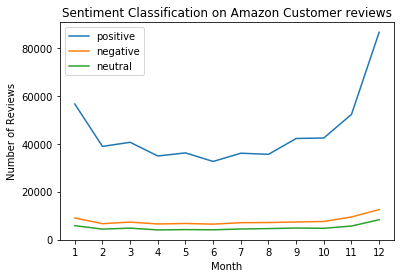

In [6]:
neg = []
pos = []
neu = []
for i in range (0,12,1):
    neg += [negative_lis_2006[i]+negative_lis_2007[i]+negative_lis_2008[i]+negative_lis_2009[i]+negative_lis_2010[i]
           +negative_lis_2011[i]+negative_lis_2012[i]+negative_lis_2013[i]]
    pos += [positive_lis_2006[i]+positive_lis_2007[i]+positive_lis_2008[i]+positive_lis_2009[i]+positive_lis_2010[i]
           +positive_lis_2011[i]+positive_lis_2012[i]+positive_lis_2013[i]]
    neu += [neutral_lis_2006[i]+neutral_lis_2007[i]+neutral_lis_2008[i]+neutral_lis_2009[i]+neutral_lis_2010[i]
           +neutral_lis_2011[i]+neutral_lis_2012[i]+neutral_lis_2013[i]]



plt. plot(time, pos, label = "positive")
plt. plot(time, neg, label = "negative")
plt. plot(time, neu, label = "neutral")
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.title('Sentiment Classification on Amazon Customer reviews')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

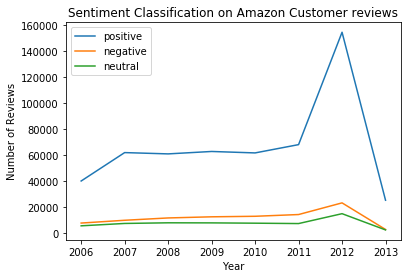

In [8]:
neg_y = []
pos_y = []
neu_y = []
time_y = []
for i in range (2006,2014,1):
    time_y +=[i]
    temp_neg = 'negative_lis_'+str(i)
    neg_y += [sum(eval(temp_neg))]
    temp_pos = 'positive_lis_'+str(i)
    pos_y += [sum(eval(temp_pos))]
    temp_neu = 'neutral_lis_'+str(i)
    neu_y += [sum(eval(temp_neu))]
    #print(neg)
plt. plot(time_y, pos_y, label = "positive")
plt. plot(time_y, neg_y, label = "negative")
plt. plot(time_y, neu_y, label = "neutral")
plt.xticks([2006,2007,2008,2009,2010,2011,2012,2013])
plt.title('Sentiment Classification on Amazon Customer reviews')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Number of Reviews')